In [3]:
import torch
from torch.nn import functional
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

### Exercise 1. Convolution with different kernels

Convolution is a common operation in image processing. It can be applied in image blurring, sharpening, edge detection, and more. In this question, your task is to apply the following kernels to images using PyTorch's `conv` function.

In [4]:
"""
  using torch's 2d convolution function

     conv2d(input, kernel, padding) → numpy.array

  * input  - input images of shape (image_height, image_width)
  * kernel - kernels of shape (kernel_height, kernel_width)
  * padding - implicit paddings on both sides of the input. can be a single number or a tuple (pad_height, pad_width)

"""

conv2d = lambda im, kr, pad=0: functional.conv2d(torch.tensor(im[None, None]), 
                                                 torch.tensor(kr[None, None]),
                                                 padding=pad).numpy().squeeze()

For reference, please see https://pytorch.org/docs/stable/nn.functional.html?highlight=functional.con#torch.nn.functional.conv2d. Note that the torch implementation is the valid cross-correlation operator. 

It might appear quite cumbersome to use torch's convolution here (and it is). However, it will become clear later what the benefits are.

__Apply the following 3x3 kernel to an image in which only a single pixel is active. What is the effect of this kernel? Explain your finding in words.__

$$ kernel = \left(\begin{matrix}
          1 & 0 & 0\\
          1 & 0 & 0\\
          1 & 1 & 0
       \end{matrix} \right)$$

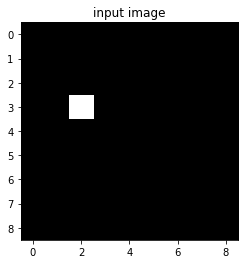

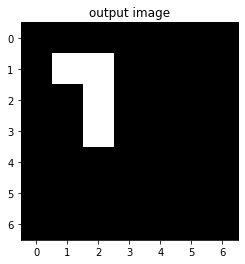

In [5]:
%matplotlib inline

img1 = np.array([[0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,1,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0]])

kernel1 = np.array([[1,0,0],
	                [1,0,0],
	                [1,1,0]])

plt.imshow(img1, cmap="Greys_r")
plt.title("input image")
plt.show()

plt.imshow(conv2d(img1, kernel1), cmap="Greys_r")
plt.title("output image")
plt.show()

```
Your answer:The kernel moved around the 9x9 matrix in search of that 1 pixel located at [3,2] while getting convolved with 3x3 slices of the input matrix. The final output tells that our kernel has done a pretty good job in locating the region around that pixel. The shape of the region however is completely due to orientation of 1's in our kernel matrix.
```

__Apply the following 3x3 kernel to an image containing a step change in brightness. What is the effect of this kernel? Explain your finding in words.__

$$ kernel = \left(\begin{matrix}
          -1 & -1 & -1\\
          -1 & 8 & -1\\
          -1 & -1 & -1
       \end{matrix} \right)$$

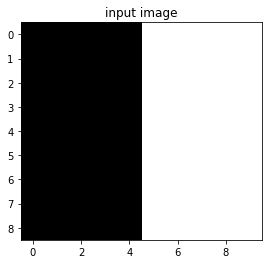

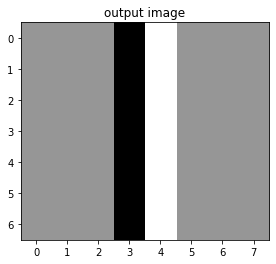

In [7]:
img2 =np.array([[0,0,0,0,0,1,1,1,1,1],
                [0,0,0,0,0,1,1,1,1,1],
                [0,0,0,0,0,1,1,1,1,1],
                [0,0,0,0,0,1,1,1,1,1],
                [0,0,0,0,0,1,1,1,1,1],
                [0,0,0,0,0,1,1,1,1,1],
                [0,0,0,0,0,1,1,1,1,1],
                [0,0,0,0,0,1,1,1,1,1],
                [0,0,0,0,0,1,1,1,1,1]])

kernel2 = np.array([[-1,-1,-1],
	                  [-1, 8,-1],
	                  [-1,-1,-1]])

plt.imshow(img2, cmap="Greys_r")
plt.title("input image")
plt.show()

plt.imshow(conv2d(img2, kernel2), cmap="Greys_r")
plt.title("output image")
plt.show()

```
Your answer:Our input image has a transition from black to white when seen in greysacle.This can be assumed as a vertical edge in the original image.This time, on seeing the output we can see that our kernel has tried to detect that vertical edge transition in the original image since after convolution we can see a distinct band around that vertical edge in the output.
```

### Exercise 2. Apply convolution with different kinds of padding

Do you notice the size of the output image is different from the input size in the previous examples? Why does that happen?

```
Your answer:It is easy to see that if we convolve a nxn input image matrix with a fxf kernel, the output matrix will have dimensions (n-f+1)x(n-f+1).So, there should definitely be a reduction in size of output image until some amount of padding is done in the input image.
```

The 2d convolution operators illustrated in excercise 1 are called "valid" convolution. PyTorch use this padding scheme by default. There are three different kinds of padding "valid", "same", "full", which give you different output sizes. Scipy's documentary gives a good description of the three types: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.convolve.html

Now let's run the following code for "padding same" and "padding full" convolution using PyTorch's `conv` function. What are the output sizes? What do you find on border pixel and interior pixels? 

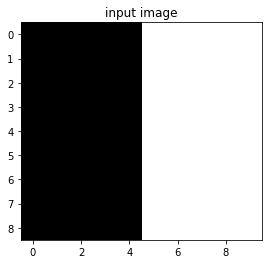

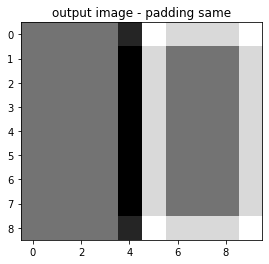

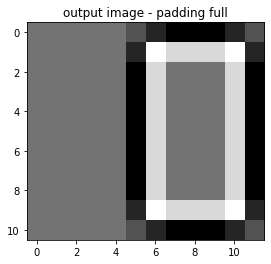

In [8]:
 """
     conv2d(input, kernel, padding) → numpy.array
     
  * paddding - implicit paddings on both sides of the input. can be a single number or a tuple (pad_height, pad_width)

"""

plt.imshow(img2, cmap="Greys_r")
plt.title("input image")
plt.show()

plt.imshow(conv2d(img2, kernel2, 1), cmap="Greys_r")
plt.title("output image - padding same")
plt.show()

plt.imshow(conv2d(img2, kernel2, 2), cmap="Greys_r")
plt.title("output image - padding full")
plt.show()

```
Your answer:The size of original image is 9x10.The size of image after convolving with padding=1 remains same as it also justifies the name of the padding('same'). The size of image with padding=2 becomes 11x12.Previously when no padding is used border pixels were used less often than the ones in the middle.Therfore a lot of information form borders was not preserved as compared to the pixels in the middle.But after padding contribution of pixels at border becomes equal to the ones in the middle as they come to the middle and no longer reamins on border.Hence we are able to preserve information of border as well as middle pixels.  
```

In general, if the kernel size is $n\times m$, what is the `padding` parameter for "padding full"? What is the `padding` parameter for "padding same"

```
Your answer:For full padding,parameter should be [(n-1),(m-1)].For same padding,parameter should be [(0.5*(n-1)),(0.5*(m-1))]
```

### Exercise 3. Iterating over feature maps (channels) and batches. 

Making use of our 2D convolution `conv2d`, implement a convolution of all feature maps in a batch. This resembles a full convolutional layer (without biases). Before you start, take a close look at what each dimension means and what shape the output will be.

In [8]:
# [minibatch, in_channels, image_height, image_width]
img = np.random.rand(10, 5, 21, 19) 

# [out_channels, in_channels, kernel_height, kernel_width]
kernel = np.random.rand(3, 5, 5, 7)

desired = functional.conv2d(torch.tensor(img), torch.tensor(kernel)).numpy().squeeze()

# [minibatch, out_channels, image_height, image_width]
desired.shape

(10, 3, 17, 13)

__Fill in the missing parts (??) of the following code:__

In [13]:
"""
`conv2d_stack` - 2D "valid" convolution looping over minibatches and channels

    r = conv2d(input, kernel) → numpy.array

  * input  - input images of shape (minibach, in_channels, image_height, image_width)
  * kernel - kernels of shape (out_channels, in_channels, kernel_height, kernel_width)

  * r - output images of shape (minibach, out_channels, out_image_height, out_image_width)
"""

########## fill in the missing parts (??) of the following code ############

def conv2d_stack(im, kr):  
    batchsize, n_feature_in, ih, iw = im.shape
    n_feature_out, _, kh, kw = kr.shape
    
    r = np.zeros((batchsize,n_feature_out,ih-kh+1,iw-kw+1))
    
    for i in range(batchsize):
        for j in range(n_feature_out):
            for k in range(n_feature_in):
                r[i,j] += conv2d(im[i,k], kr[j,k])

    return r

##############################################################################

The output of the following should be true, if your code is correct.

In [14]:
np.isclose(conv2d_stack(img, kernel), desired).all()

True

PyTorch's conv2d takes care of all of this. While you will probably never write out all these for loops again, appreciate what torch (or any other library) is doing in the background in a fraction of the time. Run this timing example to see the speedup yourself:

In [15]:
# [batch, feature map, x, y]
img = np.random.rand(40, 20, 21, 21) 

# [feature map out, feature map in, x, y]
kernel = np.random.rand(10, 20, 5, 5)

%time desired = functional.conv2d(torch.tensor(img), torch.tensor(kernel)).numpy().squeeze()
%time r = conv2d_stack(img, kernel)

Wall time: 51.9 ms
Wall time: 1.26 s


When you implement your own neural network architectures, you can use PyTorch's convolutional layer `nn.Conv2d()` which encapsulate the `nn.functional.conv2d()` function. You will encounter this in the [LeNet](https://colab.research.google.com/drive/1Neif4TvzrHj9NUEaoZS2Y24HX5tVZFxo) notebook.